##  Volume of water and tracer mass upwelled onto the shelf

In [1]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys

import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [2]:
sns.set_context('paper')
sns.set_style('white')

In [3]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 

In [4]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 

drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')



times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [5]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [7]:
ii=0
for rec in records:
    print(ii,rec.name)
    ii=ii+1
    
select_rec=[0,2,10,14,5,7,17]
labels = ['Base case',
          '$10^{-3} $m$^2$s$^{-1}$',
          '$10^{-3}$, $10^{-5} $m$^2$s$^{-1}$',
          '$10^{-2}$, $10^{-5} $m$^2$s$^{-1}$',
          'Lower $N$',
          'Lower $f$',
          'Lowest $U$']
colors = ['0.4','k','k','k','0.4','0.4','0.6']
line_sty = ['-','-','--',':','--',':','-']

0 CNTDIFF_run38
1 CNTDIFF_run37
2 CNTDIFF_run36
3 CNTDIFF_run45
4 CNTDIFF_run73
5 CNTDIFF_run75
6 CNTDIFF_run67
7 CNTDIFF_run51
8 CNTDIFF_run69
9 CNTDIFF_run71
10 3DVISC_run01
11 3DVISC_run02
12 3DVISC_run03
13 3DVISC_run04
14 3DVISC_run06
15 LOW_BF_run01
16 LOWER_BF_run01
17 LOWEST_BF_run01


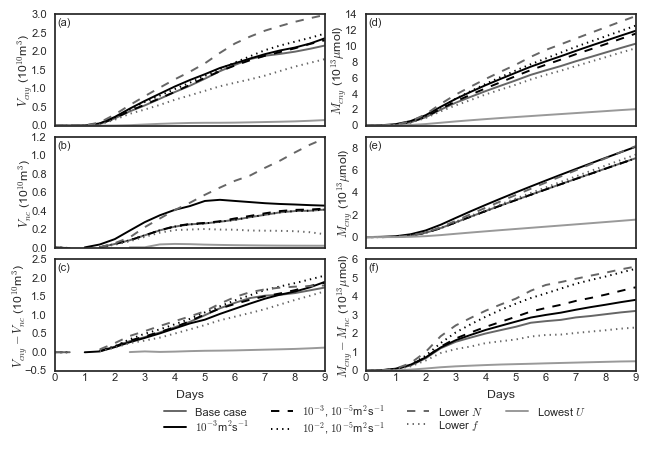

In [10]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.5,4.6)) # 190mm = 7.5in, 115cm = 4.52in

gs = gspec.GridSpec(1, 2,wspace=0.15)
gs1 = gspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,0],hspace=0.1)
gs2 = gspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,1],hspace=0.1)

ax0 = plt.subplot(gs1[0,0],xticks=[])
ax1 = plt.subplot(gs1[1,0],xticks=[])
ax2 = plt.subplot(gs1[2,0])
ax3 = plt.subplot(gs2[0,0],xticks=[])
ax4 = plt.subplot(gs2[1,0],xticks=[])
ax5 = plt.subplot(gs2[2,0])

jj = 0

for ind in select_rec:
    file = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ind].exp_code,
                                                                                records[ind].exp_code,
                                                                                records[ind].run_num))
    fileNoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].exp_code,
                                                                                   recordsNoC[ind].run_num))
    dfcan = pd.read_csv(file)
    dfnoc = pd.read_csv(fileNoC)
    
    ax0.plot(np.arange(0,19,1)/2.0,
             (dfcan['HCW'][0:19])/1E10,
             line_sty[jj],color=colors[jj],
             label=labels[jj])
    
    ax3.plot(np.arange(0,19,1)/2.0,
             (dfcan['TotTrMass'][0:19]-dfnoc['TotTrMass'][0])/1E13,
             line_sty[jj],
             color=colors[jj],label=labels[jj])
    
    ax1.plot(np.arange(0,19,1)/2.0,
             (dfnoc['HCW'][0:19])/1E10,
             line_sty[jj],color=colors[jj],
             label=labels[jj])
    
    ax4.plot(np.arange(0,19,1)/2.0,
             (dfnoc['TotTrMass'][0:19]-dfnoc['TotTrMass'][0])/1E13,
             line_sty[jj],
             color=colors[jj],label=labels[jj])
    
    ax2.plot(np.arange(0,19,1)/2.0,
             (dfcan['HCW'][0:19]-dfnoc['HCW'][0:19])/1E10,
             line_sty[jj],color=colors[jj],
             label=labels[jj])
    
    ax5.plot(np.arange(0,19,1)/2.0,
             (dfcan['TotTrMass'][0:19]-dfnoc['TotTrMass'][0:19])/1E13,
             line_sty[jj],
             color=colors[jj],label=labels[jj])
    jj=jj+1

ax0.text(0.01,0.90,'(a)',transform=ax0.transAxes)
ax1.text(0.01,0.90,'(b)',transform=ax1.transAxes)    
ax2.text(0.01,0.90,'(c)',transform=ax2.transAxes)
ax3.text(0.01,0.90,'(d)',transform=ax3.transAxes)    
ax4.text(0.01,0.90,'(e)',transform=ax4.transAxes)
ax5.text(0.01,0.90,'(f)',transform=ax5.transAxes)    


ax0.set_ylabel('$V_{cny}$ (10$^{10}$m$^3$)',labelpad=-2)
ax1.set_ylabel('$V_{nc}$ (10$^{10}$m$^3$)',labelpad=-2)
ax2.set_ylabel('$V_{cny}-V_{nc}$ (10$^{10}$m$^3$)',labelpad=-3)
ax2.set_xlabel('Days')

ax3.set_ylabel('$M_{cny}$ (10$^{13}$$\mu$mol)',labelpad=-2)
ax4.set_ylabel('$M_{cny}$ (10$^{13}$$\mu$mol)',labelpad=-2)
ax5.set_ylabel('$M_{cny}-M_{nc}$ (10$^{13}$$\mu$mol)',labelpad=-2)
ax5.set_xlabel('Days')

ax2.legend(bbox_to_anchor=(2,-0.2),ncol=4,labelspacing=0.1)

ax5.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)


plt.savefig('fig_HCW_TrMass_CanNoC.eps',format='eps',bbox_inches='tight')
